# Solution 1

1. Correct, The training error of 1-NN is better because it tries to match exact only 1 nearest neighbor, that is it'll choose itself as the closest and never make mistake, which also might sometimes cause problem of overfitting.

2. Incorrect, The test error goes down then up as k goes up because it will look for more points in neighborhood and hence increase the generalizability at the cost of variance.

3. Incorrect, A classifier is linear if its decision boundary on the feature space is a linear function: positive and negative examples are separated by an hyperplane. With kNN we don't have an hyperplane in general.

4. Correct, The computational complexity/time for classifying new samples grows linearly with the number of samples in the training  dataset in the worst-case scenario

# Solution 2

### Problem Statement: Attached is a dataset which shows the flower classification ML problem. The task is to predict the class of the plant based on certain features given in the excel file. The xlsx has 2 components one showing the variables data and another file showing the explanation of what each of these variables mean. The task is to fit a kNN classifier and to find accuracy score of this classifier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
# load dataset

data = pd.read_excel('Plant_Tree_data.xlsx')
data.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
data.shape

(17898, 9)

In [4]:
#checking the correlation between the attributes and target
data.corr()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
LeafLength,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
LeafBreadth,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
ErrorLeafLength,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
ErrorLeafBreadth,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
LeafCurveAngle,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
EdgeCurvatureAngle,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
ErrorLeafCurvature,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
TreeLength,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
TreeType,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


In [5]:
# splitting the data into feature set and target output
x = data.drop('TreeType', axis=1).values
y = data['TreeType'].values


In [6]:
x.shape

(17898, 8)

In [7]:
# Dividing the data set into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42,stratify=y)

In [8]:
x_test.shape

(5370, 8)

In [9]:
#Building model with initially k=1

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 1, metric='euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [10]:
y_pred = classifier.predict(x_test)

In [11]:
y_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [12]:
# Evaluating the algorithm
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[4799   99]
 [  79  393]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4898
           1       0.80      0.83      0.82       472

    accuracy                           0.97      5370
   macro avg       0.89      0.91      0.90      5370
weighted avg       0.97      0.97      0.97      5370



In [13]:
# find the train and test accuracy

neighbors = np.arange(1,40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train, y_train)
    #compute training and test accuracy
    train_accuracy[i] = classifier.score(x_train, y_train)
    test_accuracy[i] = classifier.score(x_test,y_test)

print(train_accuracy)
print(test_accuracy)

[1.         0.97956577 0.97964559 0.97693167 0.97693167 0.975894
 0.97597382 0.97517561 0.97469668 0.973659   0.97389847 0.97341954
 0.97373883 0.97333972 0.97310026 0.97222222 0.97238186 0.97166347
 0.97254151 0.97190294 0.97182312 0.97166347 0.97094508 0.97150383
 0.97134419 0.9717433  0.97182312 0.97166347 0.97134419 0.97134419
 0.97110473 0.97118455 0.97118455 0.97118455 0.9710249  0.97158365
 0.97150383 0.97142401 0.97134419]
[0.96685289 0.97132216 0.97430168 0.97560521 0.97541899 0.97541899
 0.97765363 0.97728119 0.97765363 0.97690875 0.97709497 0.97709497
 0.97728119 0.97672253 0.97672253 0.97690875 0.97765363 0.97728119
 0.97728119 0.97690875 0.97672253 0.97709497 0.97746741 0.97672253
 0.97728119 0.97672253 0.97728119 0.97672253 0.97672253 0.97709497
 0.97709497 0.97690875 0.97672253 0.97709497 0.97746741 0.97672253
 0.97690875 0.97653631 0.97672253]


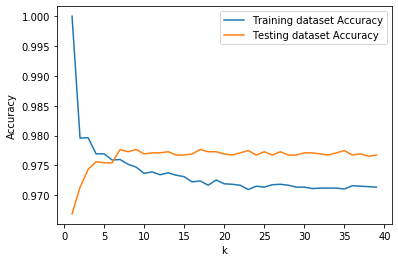

In [14]:
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')

plt.legend()
plt.xlabel('k') 
plt.ylabel('Accuracy')

plt.show()

In [15]:
# finding the best k value base on error rate (MSE (Mean square error))
k_neighbors = np.arange(1,40)
error_rate = []
for k in k_neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    error_rate.append(np.mean(y_pred != y_test))

print(error_rate)

[0.03314711359404097, 0.02867783985102421, 0.02569832402234637, 0.024394785847299812, 0.024581005586592177, 0.024581005586592177, 0.0223463687150838, 0.02271880819366853, 0.0223463687150838, 0.02309124767225326, 0.022905027932960894, 0.022905027932960894, 0.02271880819366853, 0.023277467411545624, 0.023277467411545624, 0.02309124767225326, 0.0223463687150838, 0.02271880819366853, 0.02271880819366853, 0.02309124767225326, 0.023277467411545624, 0.022905027932960894, 0.022532588454376164, 0.023277467411545624, 0.02271880819366853, 0.023277467411545624, 0.02271880819366853, 0.023277467411545624, 0.023277467411545624, 0.022905027932960894, 0.022905027932960894, 0.02309124767225326, 0.023277467411545624, 0.022905027932960894, 0.022532588454376164, 0.023277467411545624, 0.02309124767225326, 0.02346368715083799, 0.023277467411545624]


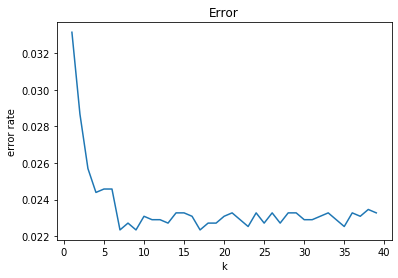

In [16]:
# plotting the error rate against the k values to find the best k value (where error rate is minimum)
# Elbow curve

plt.plot(k_neighbors, error_rate)
plt.title('Error')
plt.xlabel('k')
plt.ylabel('error rate')
plt.show()

In [17]:
# By looking at the graph above we can choose the best value of k = 9 as after that it became some what constant

In [18]:
# Modeling with the value of k=9
classifier = KNeighborsClassifier(n_neighbors = 9, metric='euclidean')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [19]:
confusion_matrix(y_pred, y_test)

array([[4856,   98],
       [  22,  394]], dtype=int64)

In [20]:
#checking the accuracy of the model
accuracy_score(y_pred, y_test)

0.9776536312849162